In [43]:
import json
import numpy as np
measures = dict()
measuresInsights = list()
def readFileSecuencial(fileName):
    global measures
    with open(fileName, "r") as f:
        content = f.readlines()

    try:
        for line in content:
            parsedLine = line.replace("\n", "").strip()
            parsedContent = parsedLine.split(":")
            if parsedContent[0] not in list(measures.keys()):
                measures[parsedContent[0]] = [float(parsedContent[1])]
            else:
                measures[parsedContent[0]].append(float(parsedContent[1]))
        print("File parsed succesfully!")
    except:
        raise Exception("An error occured")



def readFileParallel(fileName):
    global measures
    with open(fileName, "r") as f:
        content = f.readlines()

    try:
        """
        --parsedContent[0]
        { matrixSize:{
        --parsedContent[0][parsedContent[1]] = parsedContent[2]
        threadID: seconds,
        threadID: seconds,
        threadID: seconds
        ...
        }}
        """
        for line in content:
            parsedLine = line.replace("\n", "").strip()
            parsedContent = parsedLine.split(":")
            if parsedContent[0] not in list(measures.keys()):
                measures[parsedContent[0]] = {} 
            measures[parsedContent[0]][parsedContent[1]] = float(parsedContent[2])
        print("File parsed succesfully!")
    except:
        raise Exception("An error occured")



def dataInsigthsSecuencial():
    global measuresInsights
    for measure in measures.items():
        measureTimesAsArr = np.array(measure[1])
        measuresInsights.append((measure[0], np.average(measureTimesAsArr)))

def dataInsigthsParallel():
    global measuresInsights, measures
    keys = list(measures.keys())
    for matrixSize in keys:
        secondsByThread = []
        for threadId in list(measures[matrixSize].keys()):
            # print(matrixSize, threadId, measures[matrixSize][threadId])
            secondsByThread.append(measures[matrixSize][threadId])
        # print(secondsByThread)
        measureTimesAsArr = np.array(secondsByThread)
        measuresInsights.append((matrixSize, np.average(measureTimesAsArr)))
        

# readFileSecuencial("matrixOutputNotVerboseV2.log")
readFileParallel("matrixPalOutnotVerboseV1.log")
# dataInsigthsSecuencial
# print(json.dumps(measures, indent=2))
dataInsigthsParallel()
print(measuresInsights)

File parsed succesfully!
{
  "300": {
    "7": 0.145501,
    "8": 0.14076,
    "6": 0.157972,
    "4": 0.155622,
    "0": 0.16326,
    "2": 0.148408,
    "10": 0.167954,
    "13": 0.173298,
    "12": 0.170711,
    "1": 0.138991,
    "3": 0.160645,
    "11": 0.150304,
    "15": 0.175868,
    "9": 0.187309,
    "18": 0.186592,
    "17": 0.178445,
    "14": 0.181208,
    "21": 0.187285,
    "16": 0.183937,
    "20": 0.038414,
    "5": 0.167923,
    "23": 0.058391,
    "19": 0.057512,
    "22": 0.056477,
    "24": 0.039735
  },
  "600": {
    "16": 1.556554,
    "17": 1.575655,
    "6": 1.569144,
    "14": 1.514346,
    "5": 1.617083,
    "18": 1.81207,
    "8": 1.698052,
    "0": 1.507298,
    "2": 1.497422,
    "12": 1.559423,
    "13": 1.566918,
    "3": 1.567381,
    "11": 1.503313,
    "1": 1.559916,
    "15": 1.614555,
    "4": 1.522472,
    "7": 1.493911,
    "10": 1.884619,
    "24": 1.656196,
    "20": 1.781483,
    "22": 1.772673,
    "9": 1.955834,
    "19": 1.453913,
    "21": 

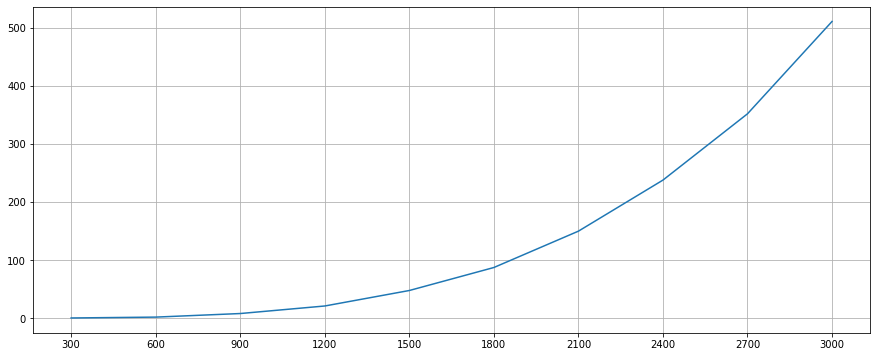

In [44]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)

def makePlot():
    global measuresInsights
    fig = plt.figure()
    ax = fig.add_subplot(111)
    matrixSizes_x = []
    timeConsumedByEachSize_y = []

    for measure in measuresInsights:
        matrixSizes_x.append(measure[0])
        timeConsumedByEachSize_y.append(measure[1])


    ax.plot(matrixSizes_x, timeConsumedByEachSize_y, )
    # for xy in zip(matrixSizes_x, timeConsumedByEachSize_y):                                       # <--
    #     ax.annotate('(%s,%2.e)' % xy, xy=xy, arrowprops=dict(facecolor='black', shrink=0.05)) # <--

    ax.grid()
    plt.show()

makePlot()

